# Limit Cycles

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = "retina"

**Definition:** A limit cycle is an <span style="color:crimson">isolated</span> closed trayectory. Isolated means that neighboring trayectories are **not** closed.

### An important example: Van der Pol oscilator

$$
    \ddot x + \mu (x^2 - 1) \dot x + x = 0; \mu > 0
$$

We can rewrite the system as
$$
\begin{align*}
    \dot x &= y\\
    \dot y &= -[\mu(x^2 -1)y + x]
\end{align*}
$$

In [3]:
def vanderpol(X, mu):
    x, y = X
    
    ẋ = y
    ẏ = -(mu * (x ** 2 - 1) * y + x)
    
    return ẋ, ẏ

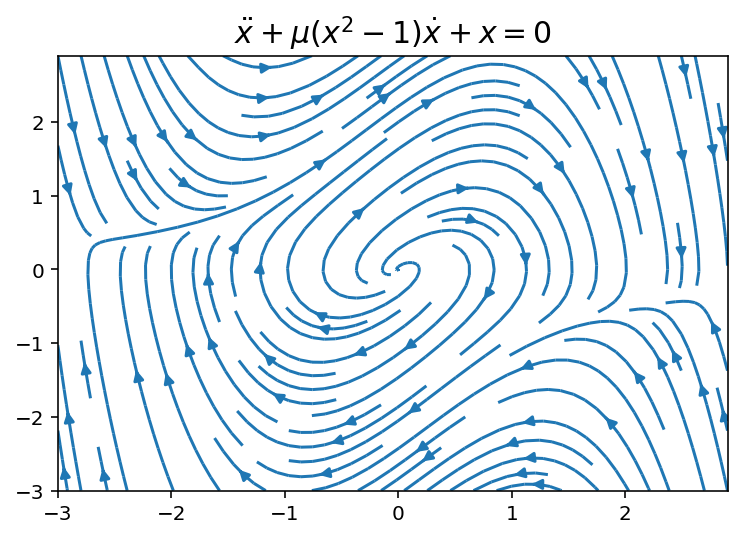

In [4]:
vmin, vmax, step = -3, 3, 0.1
mu = 1.1
X = np.mgrid[vmin:vmax:step, vmin:vmax:step][::-1]
Xdot = np.apply_along_axis(lambda X: vanderpol(X, mu), 0, X)

plt.streamplot(*X, *Xdot)
plt.title(r"$\ddot x + \mu (x^2 - 1) \dot x + x = 0$", fontsize=15);

### Example:

Show that there are no closed orbits for the system
$$
\begin{align*}
    \dot x &= \sin y\\
    \dot y &= x\cos y 
\end{align*}
$$

The previous system can be written in terms of the potential $V(x,y) = -x\sin y$. Therefore, there are no closed orbits.

### Example:

Consider the following dynamical system
$$
\begin{align*}
    \dot x &= -x + ay + x^2y\\
    \dot y &= b - ay - x^2y 
\end{align*}
$$

Construct a trapping region for this system

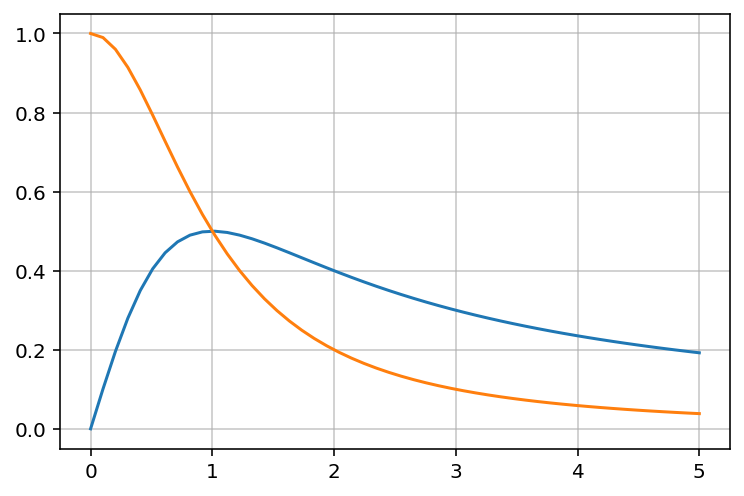

In [7]:
# 1. Find the nullclines of the system (ẋ=0, ẏ=0)
a, b = 1, 1
xrange = np.linspace(0, 5)

def x_null(x, a, b): return x / (a + x ** 2)
def y_null(x, a, b): return b / (a + x ** 2)

plt.plot(xrange, x_null(xrange, a, b))
plt.plot(xrange, y_null(xrange, a, b))
plt.grid(alpha=0.7)

Next, to find the direction of the flow, we analyse the signs of ẋ and ẏ

In [21]:
def Xdot(X, a, b, normalise=False):
    x, y = X
    ẋ = -x + a * y + x ** 2 * y
    ẏ = b - a * y - x ** 2 * y
    
    if normalise:
        norm = np.sqrt(ẋ ** 2 + y ** 2)
        ẋ /= norm
        ẏ /= norm
    
    return np.array([ẋ, ẏ])

In [50]:
points = np.array([
    [3, 0.8],
    [1, 0.2],
    [0.2, 0.6],
    [3, 0.2],
    [2, 0.1],

])

p1_flow = Xdot(p1, a, b, normalise=True)

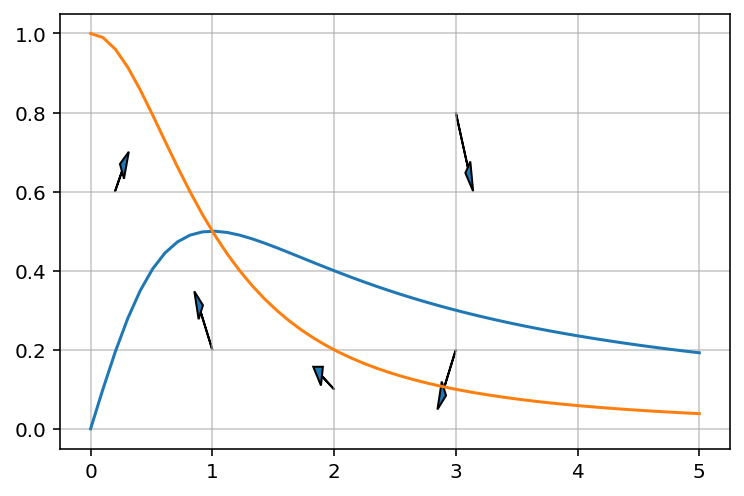

In [51]:
plt.plot(xrange, x_null(xrange, a, b))
plt.plot(xrange, y_null(xrange, a, b))

for p in points:
    p_flow = Xdot(p, a, b, normalise=True)
    plt.arrow(*p, *p_flow * 0.1, head_width=0.05)
plt.grid(alpha=0.7)

Next, the author claims to have found a bounding region